In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def feature_rep_mean(window,thrsh_tva,thrsh_gasa):
    gasa, mfoa, spp, mfop, tva = 0, 0, 0, 0, 0
    # threshold for each feature std+mean of the feature when the kick is happen
    if window['GASA (mol/mol)'].mean() >=thrsh_gasa:
        gasa = 1
        
    elif window['TVA (m3)'].mean() >=thrsh_tva :
        tva = 1
        
    
    return [gasa, tva]

In [165]:
#gasa=1,tva=2,gasa+tva=3 non kick=0

def kick_detection(featurs):
    
    if featurs[0] :
        # print('gasa')
        return 1
    if featurs[0] and featurs[1]:
        print('gasa+tva')
        return 1
    else:
        
        return 0

In [1]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\dataset\Well-8.xlsx')
df['kick_recognition'] = 111 #just initialzation


NameError: name 'pd' is not defined

In [174]:
data=df[df['STATUS']==1]
# thrsh_tva_max,thrsh_tva_min,thrsh_gasa_max,thrsh_gasa_min=  0.01,0.05
window_size =180
window_size=window_size//5
l=[]
for i in range(len(data['variation_TVA (m3)'])-window_size+1):
        window = data['GASA (mol/mol)'][i:i+window_size].mean()
        l.append(window)    

In [181]:
np.mean(l)

0.020609027777777778

<Axes: >

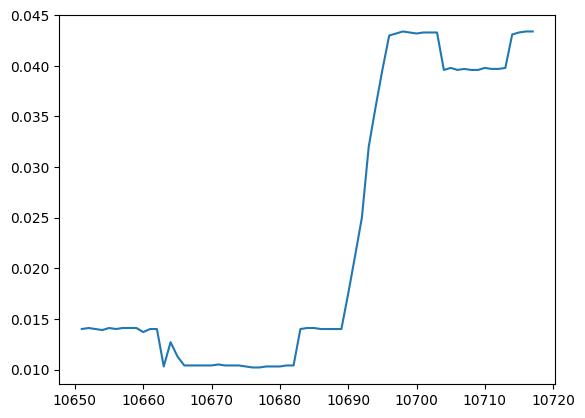

In [163]:
data['GASA (mol/mol)'].plot()

In [153]:
df['GASA (mol/mol)'][df['Unnamed: 40']=='TVA + GASA'].mean()

0.08400579032258067

In [20]:
print(max(l),min(l))

57.66466108333335 56.708180444444444


In [207]:
thrsh_tva,thrsh_gasa= 87.13,0.008
window_size =180
window_size=window_size//5
ACC=0
statu_acc=0

for i in range(len(df)-window_size+1):
                        window = df.iloc[i:i+window_size]
                # window_varation(window,wind_var)       #### i de status a au min avoir un 1 dans un window
                        #print(feature_rep_mean(window,thrsh_gasa,thrdh_mfop,thrsh_spp,thrsh_tva))
                        df['kick_recognition'][i:i+window_size]=kick_detection(feature_rep_mean(window,thrsh_tva,thrsh_gasa))
ACC=sum((df['STATUS']==df['kick_recognition']))/df.shape[0] #calculate accuracy of algorithme
data=df[df['STATUS']==1]#for get just where status=1
statu_acc=sum((data['STATUS']==data['kick_recognition']))/data.shape[0]
               
print(ACC,statu_acc)
        
        

C:\Users\hp\AppData\Local\Temp\ipykernel_4324\1559457932.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kick_recognition'][i:i+window_size]=kick_detection(feature_rep_mean(window,thrsh_tva,thrsh_gasa))


0.5039086356418713 0.7870813397129187


In [73]:
ACC=sum((df['STATUS']==df['kick_recognition']))/df.shape[0] #calculate accuracy of algorithme
ACC

0.3810603769781272

In [65]:
data=df[df['STATUS']==1]#for get just where status=1
statu_acc=sum((data['STATUS']==data['kick_recognition']))/data.shape[0]
print('status accuracy',statu_acc)

status accuracy 0.8695652173913043


In [198]:
data=df[df['STATUS']==1]


